In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#LOADING AND PREPROCESSING THE DATASET

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '../Dataset/dataset_of_plant_image',  
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    
)

val_generator = train_datagen.flow_from_directory(
    '../Dataset/dataset_of_plant_image',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 404 images belonging to 9 classes.
Found 404 images belonging to 9 classes.


#DEFINING THE CNN MODEL

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

d:\Downloads\leaf_disease_detection\project_final\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#COMPILING THE MODEL

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#TRANING THE MODEL

In [11]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10 
)

d:\Downloads\leaf_disease_detection\project_final\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 201s 15s/step - accuracy: 0.1014 - loss: 2.9043 - val_accuracy: 0.3193 - val_loss: 2.0438
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 247s 20s/step - accuracy: 0.3324 - loss: 1.9419 - val_accuracy: 0.7525 - val_loss: 1.1386
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 329s 26s/step - accuracy: 0.7697 - loss: 0.9394 - val_accuracy: 0.9455 - val_loss: 0.2961
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 250s 20s/step - accuracy: 0.9776 - loss: 0.1975 - val_accuracy: 1.0000 - val_loss: 0.0268
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 198s 15s/step - accuracy: 0.9990 - loss: 0.0171 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 198s 16s/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 169s 13s/step - accuracy: 1.0000 - loss: 8.4495e-04 - val_accuracy: 1.0000 - val_loss: 5.5852e-04
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 366s 30s/step - accuracy: 1.0000 - loss: 3.8960e-04 - val_

#SAVE MODEL

In [12]:
model.save('../savedModels/plant_deficiency_model.h5')

#PLOTING TRANINING RESULTS

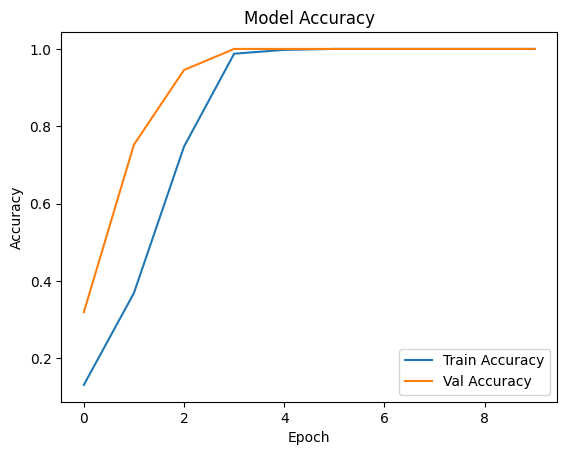

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# Load the trained model
model = load_model('../savedModels/plant_deficiency_model.h5')

# Define the image path
img_path = '../Dataset/new_test_images/leaf_test1.png'  # Use your PNG image name
image = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(image)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Define your class labels manually (example)
class_labels = ['Healthy', 'Nitrogen_Deficiency', 'Phosphorus_Deficiency', 'Potassium_Deficiency']

# Show the result safely
if predicted_class < len(class_labels):
	print("Predicted Class:", class_labels[predicted_class])
else:
	print(f"Predicted class index {predicted_class} is out of range for class_labels (length {len(class_labels)}).")
	print("Available class labels:", class_labels)
	print("Raw prediction vector:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicted class index 6 is out of range for class_labels (length 4).
Available class labels: ['Healthy', 'Nitrogen_Deficiency', 'Phosphorus_Deficiency', 'Potassium_Deficiency']
Raw prediction vector: [[1.2226886e-08 6.6586172e-06 2.2221007e-08 2.1529863e-06 6.2770060e-09
  3.8758044e-06 9.6115959e-01 2.4392509e-03 3.6388393e-02]]
